In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# R matrix
R = np.array([[-100, -100, -100, -100, -5, -100],
              [-100, -100, -100, -5, -100, 20],
              [-100, -100, -100, -5, -100, -100],
              [-100, -5, -5, -100, -5, -100],
              [-5, -100, -100, -5, -100, 20],
              [-100, -5, -100, -100, -5, 20]])

# Q-matrix
Q = np.zeros((6,6))


# Initial state
in_state = 1

#def aviable_actions(state):
#    av_act = []
#    current_state_row = R[state, :]
#
#    for ind, val in enumerate(current_state_row):
#        if val >= 0:
#            av_act.append(ind)
    
#    return av_act



In [3]:
#aviable_act = aviable_actions(in_state)
#aviable_act

In [4]:
#def sample_next(aviable_acts):
#    """This function chooses at random an action within all the aviable actions"""

#    next_act = int(np.random.choice(aviable_acts))
#    return next_act


#action = sample_next(aviable_act)
#action

In [3]:
def max_val_Q(row):

    max_index = []

    for i in range(Q.shape[1]):

        if i == 0:
            max_index.append(i)
        
        else:
            
            if Q[row, i-1] < Q[row, i]:
                max_index.pop()
                max_index.append(i)
            
            elif Q[row, i-1] == Q[row, i]:
                max_index.append(i)
            else:
                pass
    
    return max_index



In [4]:
def reinforcement_learning(epsilon, alpha, gamma, state):

    path = [state]

    if state == 5:
        score = 20
    else:
        score = 0
    
    while state != 5:
        #av_action = aviable_actions(state=state)
        #action = sample_next(av_action)

        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, 5)
            score += R[state, action]
        else:
            action = np.argmax(Q[state])
            score += R[state, action]

        if len(max_val_Q(action)) > 1:
            max_ind = int(np.random.choice(max_val_Q(action), 1))
        else:
            max_ind = max_val_Q(action)[0]
        
        max_value = Q[action, max_ind]

        # Q[state, action] = (1 – alpha) * Q[state, action] + alpha * (reward + gamma * max(Q[new_state]) — Q[state, action])
               
        Q[state, action] = (1 - alpha)*Q[state, action] + alpha*(R[state, action] + gamma*max_value - Q[state, action])

        state = action
        path.append(state)
    
    return score, path


score = []
path = []
for i in range(10000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    run = reinforcement_learning(0.1, 0.1, 0.6, current_state)
    given_score = run[0]
    used_path = run[1]
    score.append(given_score)
    path.append(used_path)


reinforcement_learning(0.1, 0.6, 0.8, 2)

(10, [2, 3, 4, 5])

In [5]:
sum(score)/len(score)

5.8065

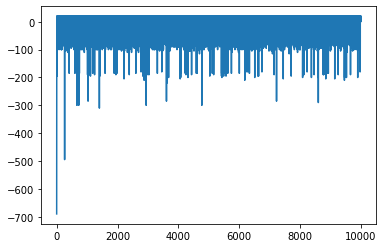

In [6]:
plt.plot(np.linspace(0, len(score), len(score)), score)
